# Part I: Research Question
## A1: Organization Question
Should the organization introduce a flat-rate monthly charge option with a tiered payment increase based off of customers' bandwidth usage? 

Clustering Technque: K-means

## A2: Goal of Data Analysis
One goal of the data analysis is to determine if customers can be grouped into tiers based solely on their monthly charges and their yearly data usage. If clustering is effective, the organization can begin gathering evidence to determine whether or not a flat-rate monthly charge with tiered data payments could be beneficial.

# Part II: Technique Justification

## B1: Clustering Technique Explanation
Unsupervised learning finds patterns in data without using specified labels to conduct predictions as with supervised learning. One type of unsupervised learning technique is k-means clustering. 

K-means clustering starts by generating random cluster centers on the data points of the data being used. The number of clusters(n) is determined by the set parameter or the default parameter. Next, the sum of squared distances between the initial cluster centers and each data point is calculated and n clusters are labeled according to the closest distance to each cluster center. The new cluster centers for each cluster are calculated and the distances from each data point to the new cluster centers are calculated. The sum of squared distances is again calculated and new clusters are labeled. This process continues until the smallest sum of squared distances is calculated for each cluster or the maximum number of iterations is reached.  

## B2: Assumption Summarization
K-means clustering has a bias towards creating equal-sized clusters and may not create the assumed clusters based on the initial visualization of a plot of the data points. That being noted, one assumption of the k-means clustering is that all clusters are approximately the same size. If clusters of different sizes are included in the dataset k-means may not discover the correct assumed clusters. (Winn)

## B3: Packages and Libraries

Below is the list of the packages and libraries and the justification for use in the process of conducting k-means clustering and visualization:

- ```Pandas```: This package is used to import data and create dataframes from the initial dataset to be used in the k-means model.
- ```Numpy```: This package is used to perform mathmatical computations used in the clustering process.
- ```Scipy``` - This package is used to perform the various tasks of clustering including normalization or standardization of the data and creating the clustering model and fitting of the data.
-```sklearn```- This packages is used to perform preprocessing tasks used to prepare the data for clustering.
- ```Matplotlib```: This package is used to visualize the data and output of clustering output.
- ```Seaborn```: This package is built off ```Matplotlib``` and used to create advanced visualization of the data and output of clustering output.

In [14]:
#Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler

# Part III: Data Preparation

## C1: Data Preprocessing Goal

K-means uses distances between data points to perform clustering calculations. Because of this, performing K-means clustering with variables with different variances can return problematic results. To prevent this, one goal of data preprocessing is to transform the data to have similar variances. This is conducted through standardization or normalization. Standardization is a scaling technique that centers values around the mean with a unit standard deviation whereas normalization scales variables so they end up ranging between 0 and 1. Standardization is best used when data follows a normal distribution and normalization is best used when it is not.

## C2: Initial Dataset Variables

In the analysis, only two variables were selected. Kmeans clustering works best with 2 or 3 variables as the human mind has difficulty interpreting data involving more than 3 dimensions. If more than 3 variables are desired, principle component analysis should be performed. The initial dataset variables that will be used to perform the analysis are as follows:

- MonthlyCharge (continuous): The amount charged to the customer monthly. This value reflects an average per customer. For brand new customers, this value is the average for other customers who fit the new customer’s profile.

- Bandwidth_GB_Year (continuous): The average amount of data used, in GB, in a year by the customer (if the customer is newer than a year, this value is approximated based on initial use or of average usage for a typical customer in their demographic profile)

### Step 1 - Importing the Data
The churn_clean.csv file is imported using pandas read_csv function.

## C3: Steps to Prepare the Data

In [15]:
#Importing churn_clean data set
churn_clean = pd.read_csv('C:/Users/holtb/Data/D212_Data_Mining_II/data/churn_clean.csv')

### Step 2 - Create a new DataFrame 
A new DataFrame is created from the churn_clean data set using only the variables to be used in the clustering model using pandas DataFrame function.

In [16]:
# Create DataFrame df with MonthlyCharge and Bandwidth_GB_Year variables.
df = pd.DataFrame(churn_clean[['MonthlyCharge','Bandwidth_GB_Year']])

### Step 3 - Standardize Data
The ```StandardScaler``` function from ```sklean.preprocessing``` is used to standardize the features from the df DataFrame.

In [17]:
#Create the StandardScaler instance
scaler = StandardScaler()

#Fit and transform the scaled data into a new DataFrame.
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.columns = ['scaled_MonthlyCharge', 'scaled_Bandwidth_GB_Year']

## C4: Copy of Cleaned Dataset

In [18]:
scaled_df.to_csv('C:/Users/holtb/Data/D212_Data_Mining_II/data/scaled_df.csv')
scaled_df.head()

,scaled_MonthlyCharge,scaled_Bandwidth_GB_Year
0,-0.003943,-1.138487
1,1.630326,-1.185876
2,-0.295225,-0.612138
3,-1.226521,-0.561857
4,-0.528086,-1.428184


# Part IV: Analysis

## D1 & D2: Description of Analysis Technique & Code

To begin the analysis, the appropriate number of clusters to be used in the model needs to be determined. Although there is no absolute method to find "the right number" this was performed by conducting the elbow method. The elbow method is performed by creating a plot of distortions (the distances between each cluster) against a determined range of clusters. The number of clusters to be used in the final model is selected from the plot where the line begins to flatten out. The flattening of the line suggests that further clustering provides little information past that number of clusters. 

First, an empty list called ```distortions``` is created and then a range list ```num_clusters``` is created with a range of cluster numbers to be created. 

In [19]:
# Declaring variables for use
distortions = []
num_clusters = (range(2,15))

Next, the k-means model is run on the selected variables under a loop. This outputs the list of cluster centers and the distortion value in relation the specific number of clusters in the range. The distortion value is appended into the list ```distortions``` for each specific number of clusters in the range.

In [20]:
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(scaled_df[['scaled_MonthlyCharge', 'scaled_Bandwidth_GB_Year']], i)
    distortions.append(distortion)

Finally, the plot of the ```distortions``` and ```num_clusters``` is created using ```seaborn```. By looking at the plot we can see that the line begins to flatten out around 6 clusters. This suggests that using 6 clusters in the model would be ideal.

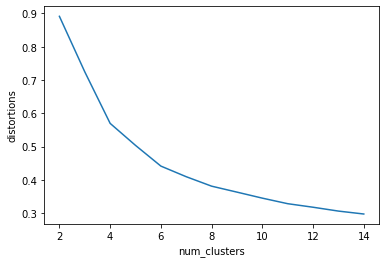

In [21]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                                'distortions': distortions})

sns.lineplot(x='num_clusters', y= 'distortions',
             data = elbow_plot_data)
plt.show()

After the determined number of clusters to find is determined. The k-means model is now ran again but specifying the number of clusters to be created for one model. The cluster labels for each data point are then created using the ```vq``` function by determining distortions and grouping them into n groups of cluster labels. 

In [22]:
# Generate cluster centers and labels
cluster_centers, _ = kmeans(scaled_df[['scaled_MonthlyCharge', 'scaled_Bandwidth_GB_Year']], 6)
scaled_df['cluster_labels'], _ = vq(scaled_df[['scaled_MonthlyCharge', 'scaled_Bandwidth_GB_Year']], cluster_centers)

Finally, the visualization of the scatterplots of the variables is created using ```seaborn``` with the hue parameter set as the newly created cluster labels. The visualization enables users to see the effects of the clustering for exploration.

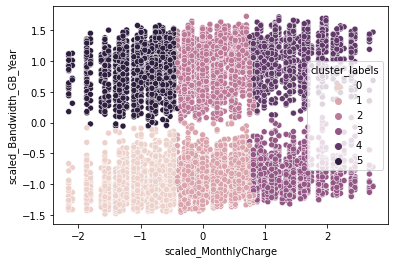

In [23]:
# Generate scatter plot with seaborn
sns.scatterplot(x='scaled_MonthlyCharge', 
                y='scaled_Bandwidth_GB_Year',
                hue='cluster_labels',
                data=scaled_df)
plt.show()

# Part V: Data Summary and Implications
## E1: Summarization of Data Analysis
Since the unsupervised learning process uses the entire data set to perform the analysis one way to test the accuracy of the model is to perform the model on a new set of data. In this case, new data is not available. However, since k-means uses random starting positions, another model can be run starting at a different random seed to determine if there are significant changes to the labeling of the data points compared to the initial model.  

In [24]:
# initializing a random seed.
from numpy import random
random.seed(23)

In [25]:
# Generate cluster centers and labels
cluster_centers, _ = kmeans(scaled_df[['scaled_MonthlyCharge', 'scaled_Bandwidth_GB_Year']], 6)
scaled_df['cluster_labels'], _ = vq(scaled_df[['scaled_MonthlyCharge', 'scaled_Bandwidth_GB_Year']], cluster_centers)

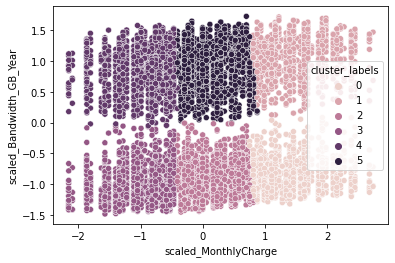

In [26]:
# Generate scatter plot with seaborn
sns.scatterplot(x='scaled_MonthlyCharge', 
                y='scaled_Bandwidth_GB_Year',
                hue='cluster_labels',
                data=scaled_df)
plt.show()

Although the cluster labels are different, by comparing the two visualizations it can be determined that the clusters themselves are accurate except for of a handful of data points located between the two large clusters of data points.

## E2: Results and Implication of the Analysis
Even though the dataset without labels shows there are clearly two large clusters, by creating the six clusters more information can be pulled from the data. By performing a visual analysis on the model output, it can be determined that customers can clearly be grouped into six different clusters based on how much their monthly charge is and the amount of data that they use annually. These customers could be grouped into the categories: 

1) Low-Charge, Low-Usage
2) Low-Charge, High-Usage
3) Mid-Charge, Low-Usage
4) Mid-Charge, High-Usage
5) High-Charge, Low-Usage
6) High-Charge, High-Usage

## E3: One Limitation of the Analysis
One limitation of the analysis is that the number of clusters created from the dataset may not match the actual real groupings. Although the elbow method is a good way to select the number of clusters, the number of clusters is still somewhat arbitrary. Looking back at the plot of cluster numbers and distortions, four clusters could still be another good cluster number to choose. Cluster numbers should be chosen carefully based on the question the analysis is trying to answer.

## E4: Recommended Course of Action
While the analysis doesn't expressly tell the organization whether or not a flat-rate monthly option should be implemented, it does show clearly that there is disproportionate usage compared to charges to the customer and that customers can be grouped easily. The recommendation is that if the flat-rate option is implemented it should first be targeted to customers in the high-charge or mid_charge, low-usage group to evaluate the effects on revenue and customer retention.  

# Part VI: Demonstration

## Video

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5a7c4403-7397-49a3-97c3-ae060143ce9a

## Code Sources

Daityari, S. "Cluster Analysis in Python" [MOOC]. Datacamp. https://campus.datacamp.com/courses/cluster-analysis-in-python

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. (Publisher link).

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Python Software Foundation. Python Language Reference, version 3.7. Available at http://www.python.org

## In-text Citations

Winn, John Michael. Model-Based Machine Learning. Chapman & Hall/CRC, 2019.